In [122]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [123]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [124]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
data = np.array(data)
m , n = data.shape 
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:m]
X_train = X_train / 255.
_,m_train = X_train.shape


In [126]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z)) 
    return A
    
def forward(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    """We create a new array that contains 0, the length of that is from Y.size i.e 'm'
    Now the range for it is from Y that is 0 to Y.max i.e 9 and then we add 1 to it n this gives 10
    this is the exact number of output classes that we need."""
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) 
    """Now we take the same matrix and we take a range of it from Y.size that is the number of rows
    and Y i.e labels or the number of columns we have, now this is specifying that we go to the specified 
    label Y and then replace that with 1."""
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def ReLU_deriv(Z):
    return Z > 0

def back(Z1,A1,Z2,A2,W1,W2,X,Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [127]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [128]:
W1 , b1 , W2 , b2 = gradient_descent(X_train , Y_train , 0.10 , 500)

Iteration:  0
[1 1 1 ... 1 6 6] [4 1 9 ... 6 5 0]
0.1318048780487805
Iteration:  10
[6 1 0 ... 6 6 0] [4 1 9 ... 6 5 0]
0.22526829268292684
Iteration:  20
[6 1 2 ... 6 0 0] [4 1 9 ... 6 5 0]
0.2972682926829268
Iteration:  30
[8 1 2 ... 6 0 0] [4 1 9 ... 6 5 0]
0.3631219512195122
Iteration:  40
[8 1 2 ... 4 0 0] [4 1 9 ... 6 5 0]
0.41348780487804876
Iteration:  50
[8 1 2 ... 4 0 0] [4 1 9 ... 6 5 0]
0.4545365853658537
Iteration:  60
[8 1 2 ... 4 0 0] [4 1 9 ... 6 5 0]
0.4939512195121951
Iteration:  70
[8 1 8 ... 6 7 0] [4 1 9 ... 6 5 0]
0.529390243902439
Iteration:  80
[9 1 8 ... 6 7 0] [4 1 9 ... 6 5 0]
0.5669756097560975
Iteration:  90
[9 1 8 ... 6 7 0] [4 1 9 ... 6 5 0]
0.5994146341463414
Iteration:  100
[9 1 8 ... 6 5 0] [4 1 9 ... 6 5 0]
0.6266585365853659
Iteration:  110
[9 1 8 ... 6 5 0] [4 1 9 ... 6 5 0]
0.648
Iteration:  120
[9 1 8 ... 6 5 0] [4 1 9 ... 6 5 0]
0.6660731707317074
Iteration:  130
[9 1 8 ... 6 3 0] [4 1 9 ... 6 5 0]
0.6811707317073171
Iteration:  140
[9 1 8 ... 6 

In [131]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


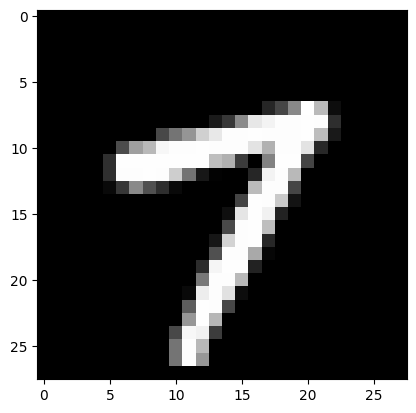

In [132]:
test_prediction(5,W1,b1,W2,b2)

Prediction:  [6]
Label:  6


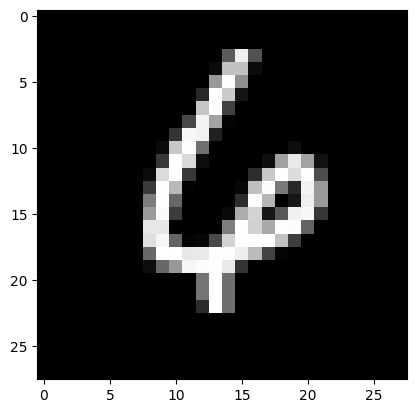

In [133]:
test_prediction(8,W1,b1,W2,b2)

Prediction:  [4]
Label:  4


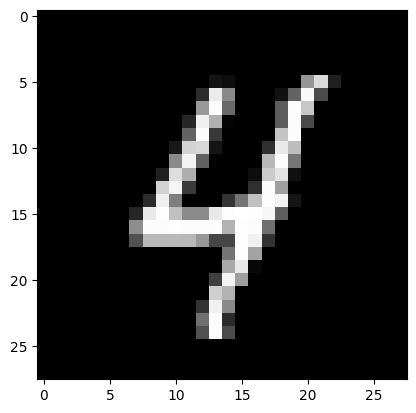

In [134]:
test_prediction(3,W1,b1,W2,b2)

Prediction:  [1]
Label:  1


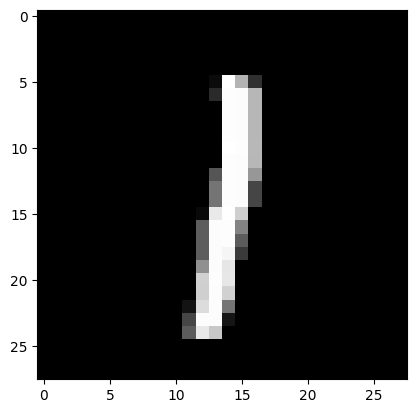

In [139]:
test_prediction(1,W1,b1,W2,b2)

Prediction:  [4]
Label:  9


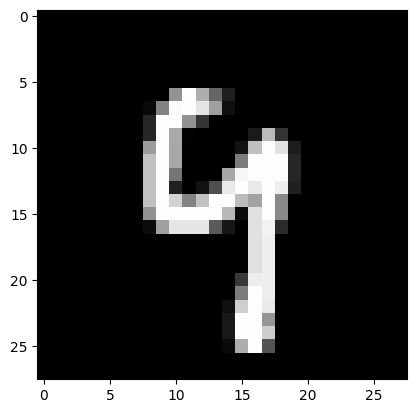

In [140]:
test_prediction(2,W1,b1,W2,b2)

In [141]:
# Testing on the dev set
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 8 8 8 2 0 1 2 1 0 4 9 5 7 8 3 4 0 0 4 3 0 9 7 8 1 1 6 3 1 3 3 1 5 6 8 8
 1 3 3 0 2 6 0 2 4 5 8 3 3 4 1 9 6 2 2 1 6 8 4 8 3 2 6 7 4 9 8 4 3 9 9 7 7
 1 1 7 2 6 6 8 9 6 9 9 3 9 2 9 2 0 8 9 2 4 9 0 1 1 5 2 8 1 9 5 1 0 3 1 6 8
 6 0 4 8 9 0 1 9 9 5 1 6 8 1 1 1 9 0 2 6 6 6 4 5 2 0 1 2 4 0 0 4 1 7 0 5 3
 0 9 1 9 5 5 5 3 7 4 7 4 6 2 1 4 3 2 1 2 9 4 9 7 9 6 6 0 4 3 3 1 5 5 0 6 5
 7 0 7 0 3 5 5 3 3 2 5 8 1 3 5 2 6 4 2 8 6 2 6 5 9 0 6 3 9 6 0 0 3 2 1 2 3
 3 2 1 8 6 7 2 0 5 3 7 9 8 0 1 8 5 8 8 8 4 7 6 7 2 2 0 2 2 0 0 9 3 9 1 4 4
 6 1 7 2 8 7 9 8 8 8 0 6 9 5 5 6 9 8 0 5 3 2 2 6 6 9 9 5 5 6 9 2 9 4 0 1 8
 2 6 2 0 8 3 3 9 0 9 3 2 5 8 2 2 2 0 6 4 1 2 0 1 9 0 8 4 9 8 8 4 2 9 4 9 0
 3 7 1 5 7 8 8 6 9 0 3 7 7 0 7 4 5 6 1 8 1 0 4 3 5 2 2 2 5 4 0 9 0 1 2 0 3
 6 1 8 9 3 3 4 5 9 8 4 9 2 2 2 6 1 9 9 1 5 3 0 0 2 0 9 7 7 8 3 8 8 4 2 3 2
 8 5 1 9 3 1 0 6 4 5 5 9 5 7 9 8 8 7 3 0 0 9 2 8 4 7 1 3 0 8 5 8 1 1 4 5 0
 9 2 5 4 4 1 4 0 3 9 6 5 8 5 3 0 0 0 4 2 6 9 7 2 6 0 1 9 7 0 9 3 5 7 6 2 3
 9 1 3 7 7 5 9 9 0 4 1 1 

0.827